# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Akbar Ariffianto
- **Email:** akbarariffianto04@gmail.com
- **ID Dicoding:** akbar04

## Menentukan Pertanyaan Bisnis

- Apakah terdapat pola musiman dalam kualitas udara? Misalnya, apakah polutan udara lebih tinggi pada tahun tertentu?
- Apakah kualitas udara lebih buruk pada waktu-waktu tertentu dalam sehari (seperti pagi atau malam hari)?
- Apakah hujan secara signifikan mengurangi polutan di udara?
- Apakah ada korelasi antara suhu tinggi dan peningkatan polutan seperti O3 yang berbahaya?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

Mengumpulkan data yang dibutuhkan dan menampilkan data tersebut.

In [5]:
aotizhongxin_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

all_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=True)

Data kualitas udara di semua stasiun

In [6]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset ini berisi informasi tentang kualitas udara dan cuaca dari beberapa stasiun

# Assessing Data

## Menilai kualitas data yang digunakan

### Data Pada Stasiun Aotizhongxin

In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [8]:
all_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [9]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Setiap data memiliki missing value
- Data numerik yang bersifat numerik akan diganti dengan nilai yang didapatkan melalui  metode interpolasi
- Sedangkan untuk yang bertipe data object akan dihapus

### Cleaning Data

In [15]:
all_df = all_df.interpolate(method='linear')

<ipython-input-15-fbd0c5219a8a>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_df = all_df.interpolate(method='linear')


In [16]:
all_df.dropna(subset=['wd'], inplace=True)

In [17]:
all_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Metode interpolasi lebih baik digunakan untuk mengganti missing value dengan data numerik yang bersifat berurutan atau waktu.
- Penghapusan baris data yang memiliki nilai nan pada kolom wd dilakukan karena jumlah data dengan nilai nan sedikit.
- Pada data yang memiliki missing value pada kolom NO2 walaupun nilainya sudah diganti menggunakan metode interpolasi akan diganti dengan

## Exploratory Data Analysis (EDA)

### Explore ...

Menggabungkan semua dataframe untuk mendapatkan jumlah polutan udara tiap tahun di semua stasiun

In [ ]:
all_df['year'] = pd.to_datetime(all_df['year'], format='%Y').dt.year
yearly_avg_pollution = all_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
print(yearly_avg_pollution)

          PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  79.745133  103.185869  19.999385  52.052758  1204.889697  56.272630
2014  86.186702  116.825096  21.205783  55.049332  1271.163714  57.899456
2015  79.216248  103.572019  13.008082  48.285667  1260.608729  59.459039
2016  71.900497   94.579721   9.789935  46.053534  1134.967761  58.403302
2017  91.923325  110.444663  17.943596  56.869789  1605.020432  40.267226


In [ ]:
hourly_avg_pollution = all_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

max_hour_per_pollutant = hourly_avg_pollution.idxmax()

print(max_hour_per_pollutant)

PM2.5    22
PM10     21
SO2      11
NO2      22
CO        1
O3       16
dtype: int64


In [ ]:
all_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN']].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN
count,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000
mean,79.750944,104.841074,15.926046,50.556388,1233.766952,57.375427,0.064595
std,80.916913,92.400076,21.917434,35.157214,1160.238133,57.179384,0.822313
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.710000,0.000000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,0.000000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,0.000000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,72.500000


In [ ]:
rain_mean = all_df['RAIN'].mean()
all_df['rain_category'] = all_df['RAIN'].apply(lambda x: 'rendah' if x <= rain_mean else 'tinggi')

rata2_polutan_by_kategori_hujan = all_df.groupby('rain_category')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

rata2_polutan_by_kategori_hujan

,PM2.5,PM10,SO2,NO2,CO,O3
rain_category,,,,,,
rendah,80.465960,106.265399,16.353808,51.089182,1238.910909,57.601637
tinggi,62.275952,70.030570,5.471519,37.534891,1108.048619,51.846854


In [ ]:
temp_mean = all_df['TEMP'].mean()
all_df['temp_category'] = all_df['TEMP'].apply(lambda x: 'rendah' if x <= temp_mean else 'tinggi')

rata2_polutan_by_kategori_suhu = all_df.groupby('temp_category')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

rata2_polutan_by_kategori_suhu

,PM2.5,PM10,SO2,NO2,CO,O3
temp_category,,,,,,
rendah,89.680525,112.996803,22.859685,59.519810,1573.046394,29.196783
tinggi,70.683722,97.393648,9.594574,42.371415,923.953021,83.106831


In [ ]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

max_min_stations = {}

for pollutant in pollutants:
    max_station = all_df.loc[all_df[pollutant].idxmax(), 'station']
    min_station = all_df.loc[all_df[pollutant].idxmin(), 'station']

    max_min_stations[pollutant] = {
        'max_value': all_df[pollutant].max(),
        'max_station': max_station,
        'min_value': all_df[pollutant].min(),
        'min_station': min_station
    }

for pollutant, stats in max_min_stations.items():
    print(f"{pollutant}:")
    print(f"  Max: {stats['max_value']} at {stats['max_station']}")
    print(f"  Min: {stats['min_value']} at {stats['min_station']}")


PM2.5:
  Max: 999.0 at Wanshouxigong
  Min: 2.0 at Changping
PM10:
  Max: 999.0 at Changping
  Min: 2.0 at Aotizhongxin
SO2:
  Max: 500.0 at Gucheng
  Min: 0.2856 at Aotizhongxin
NO2:
  Max: 290.0 at Aotizhongxin
  Min: 1.0265 at Dingling
CO:
  Max: 10000.0 at Aotizhongxin
  Min: 100.0 at Aotizhongxin
O3:
  Max: 1071.0 at Dongsi
  Min: 0.2142 at Aotizhongxin


**Insight:**
- Mendapatkan informasi tentang kapan setiap polutan memiliki nilai yang tinggi diantaranya
- Aotizhongxin merupakan stasiun yang memiliki nilai polutan paling banyak terjadi perubahan
- Curah hujan berdampak pada kualitas udara dimana tingkat hujan tinggi menyebabkan polutan berkurang begitu juga sebaliknya
- Suhu berdampak pada kualitas udara dimana tingkat suhu tinggi maka tingkat polutan meningkat

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat pola musiman dalam kualitas udara? Misalnya, apakah polutan udara lebih tinggi pada tahun tertentu?

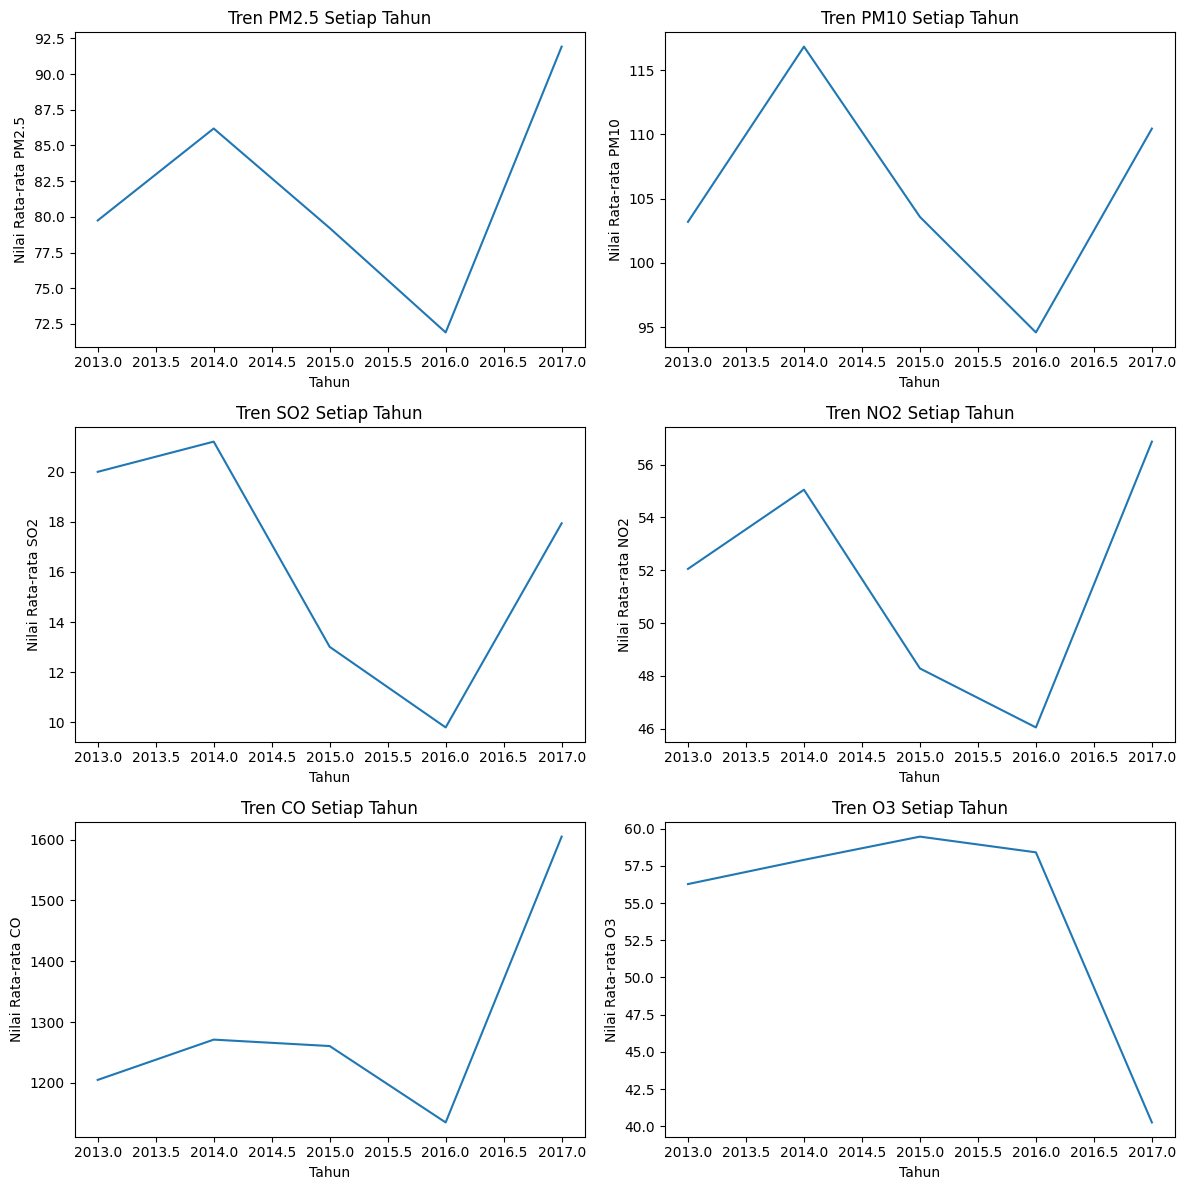

In [ ]:
plt.figure(figsize=(12, 12))

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i + 1)
    yearly_avg = all_df.groupby('year')[pollutant].mean().reset_index()
    sns.lineplot(data=yearly_avg, x='year', y=pollutant)

    plt.title(f'Tren {pollutant} Setiap Tahun')
    plt.xlabel('Tahun')
    plt.ylabel(f'Nilai Rata-rata {pollutant}')

plt.tight_layout()
plt.show()

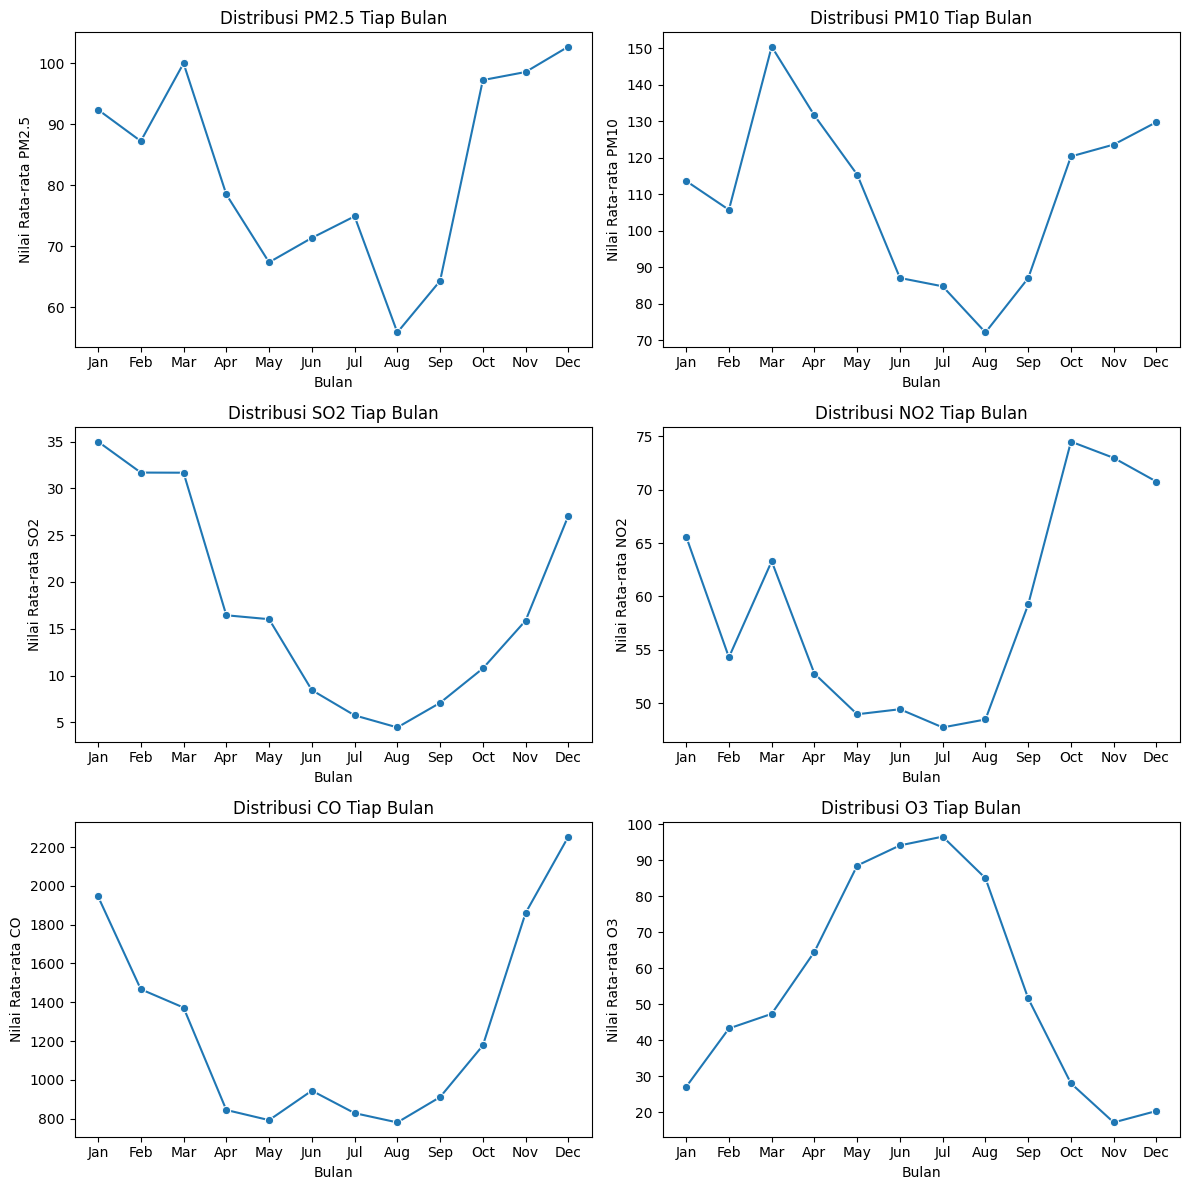

In [18]:
all_df['month'] = pd.to_datetime(all_df['month'], format='%m').dt.month

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 12))

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i + 1)
    monthly_avg = all_df.groupby('month')[pollutant].mean().reset_index()
    sns.lineplot(data=monthly_avg, x='month', y=pollutant, marker='o')

    plt.title(f'Distribusi {pollutant} Tiap Bulan')
    plt.xlabel('Bulan')
    plt.ylabel(f'Nilai Rata-rata {pollutant}')

    plt.xticks(range(1, 13), month_names)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah kualitas udara lebih buruk pada waktu-waktu tertentu dalam sehari (seperti pagi atau malam hari)?

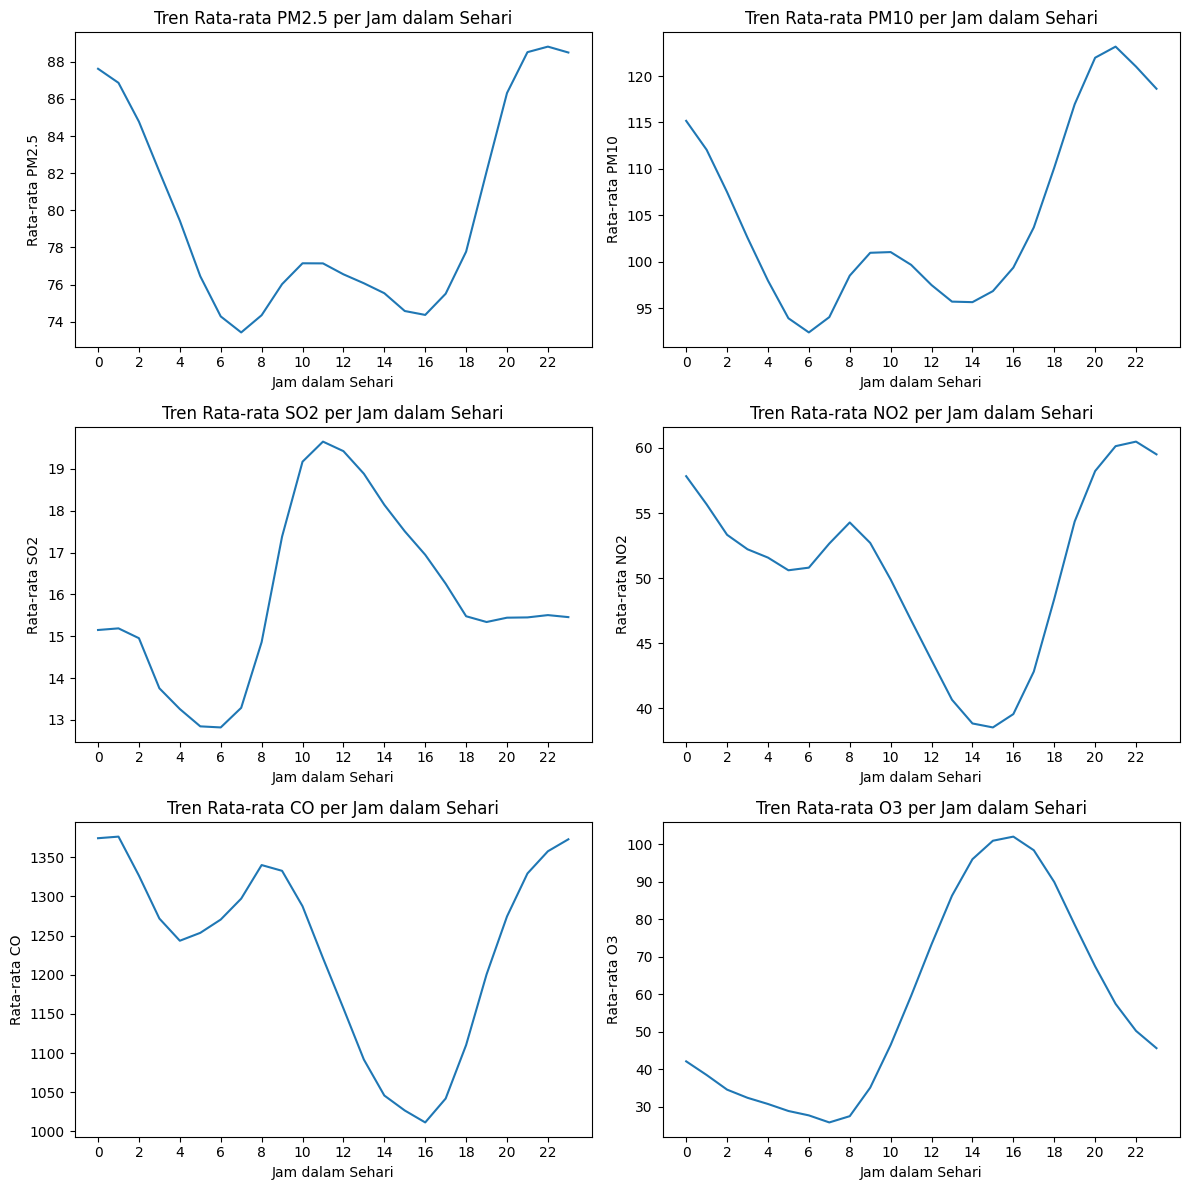

In [ ]:
plt.figure(figsize=(12, 12))

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

hourly_avg = all_df.groupby('hour')[pollutants].mean().reset_index()

for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i + 1)
    sns.lineplot(data=hourly_avg, x='hour', y=pollutant)

    plt.title(f'Tren Rata-rata {pollutant} per Jam dalam Sehari')
    plt.xlabel('Jam dalam Sehari')
    plt.ylabel(f'Rata-rata {pollutant}')
    plt.xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()


### Pertanyaan 3: Apakah hujan secara signifikan mengurangi polutan di udara?

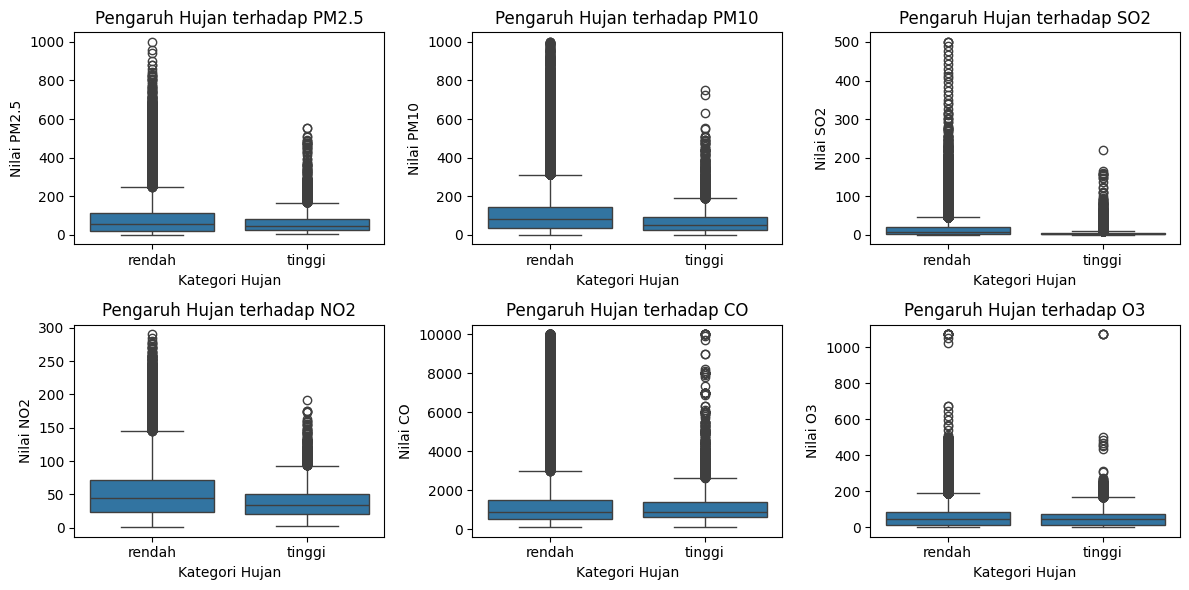

In [ ]:
plt.figure(figsize=(12, 6))

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for i, pollutant in enumerate(pollutants):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(x='rain_category', y=pollutant, data=all_df)
  plt.title(f'Pengaruh Hujan terhadap {pollutant}')
  plt.xlabel('Kategori Hujan')
  plt.ylabel(f'Nilai {pollutant}')

plt.tight_layout()
plt.show()


### Pertanyaan 4: Apakah ada korelasi antara suhu tinggi dan peningkatan polutan seperti O3 yang berbahaya?

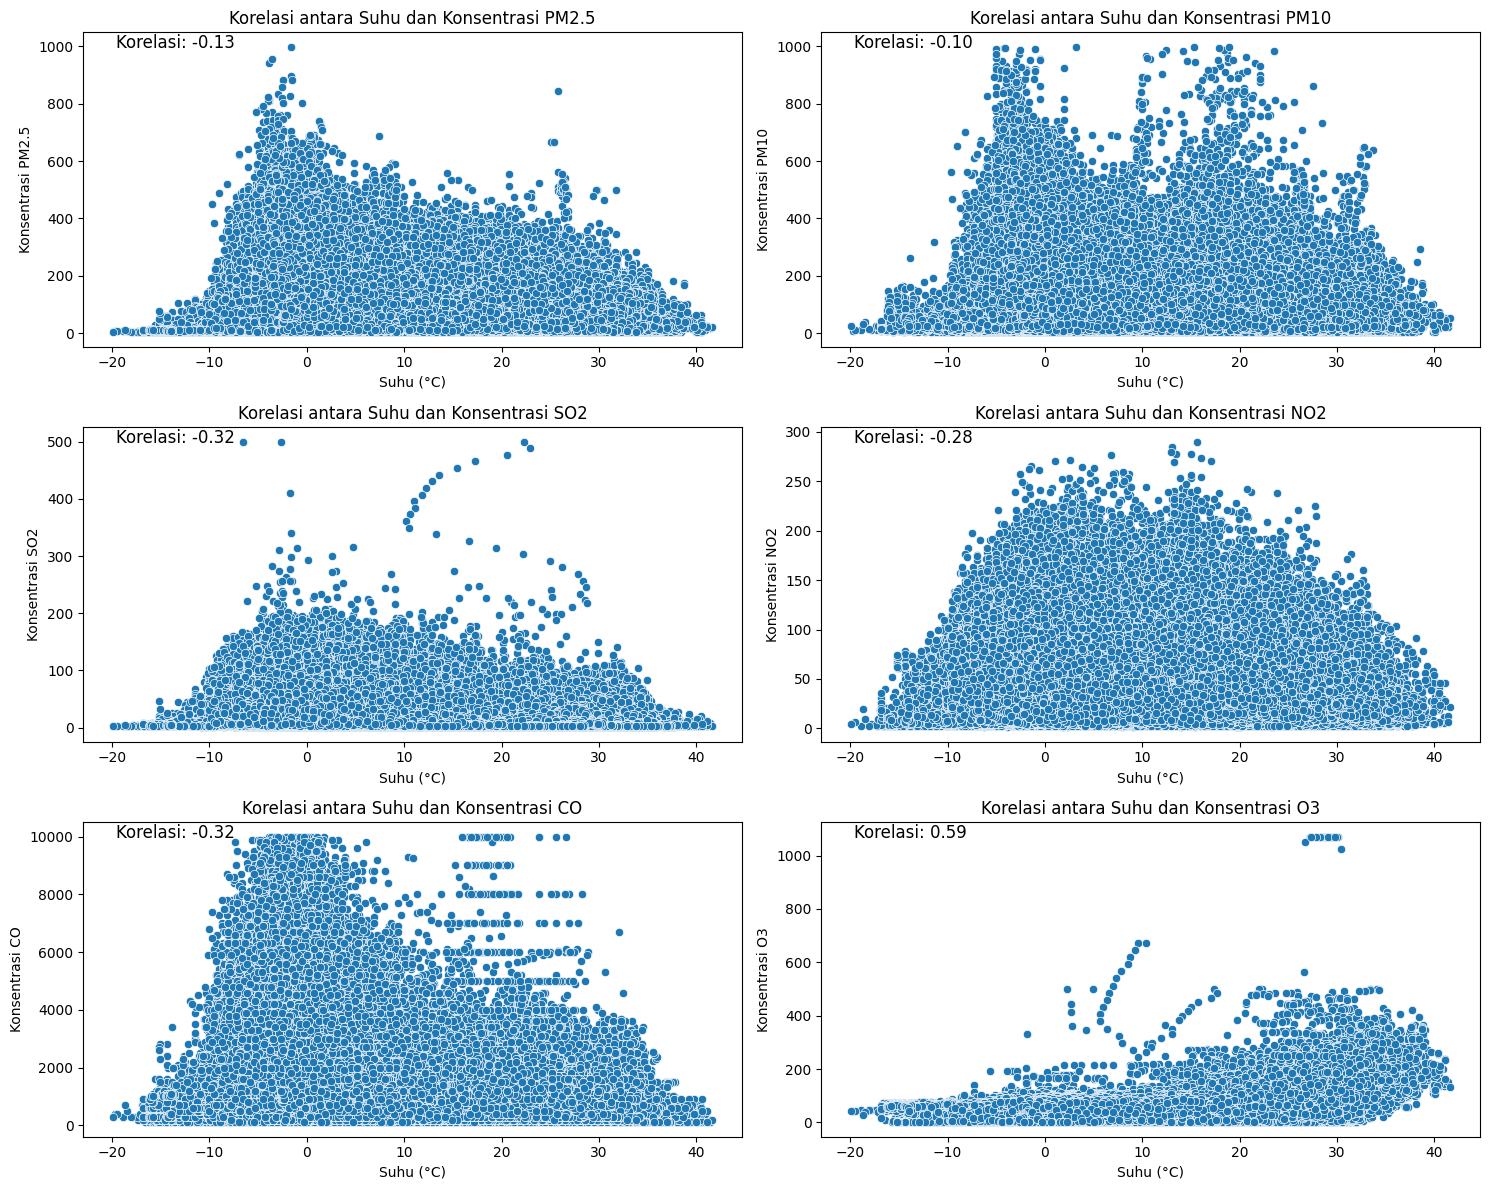

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(15, 12))

for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x='TEMP', y=pollutant, data=all_df)

    plt.title(f'Korelasi antara Suhu dan Konsentrasi {pollutant}')
    plt.xlabel('Suhu (°C)')
    plt.ylabel(f'Konsentrasi {pollutant}')

    correlation = all_df['TEMP'].corr(all_df[pollutant])
    plt.annotate(f'Korelasi: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()


**Insight:**
- Setiap tahun kualitas udara banyak terjadi perubahan, pada tahun 2016 semua polutan berkurang sedangkan O3 naik, namun pada tahun 2017 O3 terjadi penurunan drastis melainkan polutan yang lain makin naik.
- Fluktuasi kadar PM2.5 dan PM10 hampir sama di setiap jam di satu hari.
- Curah hujan yang tinggi dapat menurunkan kadar polutan
- Hanya O3 yang memiliki korelasi dengan suhu

## Clustering


### Mencari Hubungan Kecepatan Angin dengan Polutan PM2.5

In [ ]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
all_df['WSPM_bin'] = pd.cut(all_df['WSPM'], bins=bins, labels=labels)
avg_pm25_by_wind_speed = all_df.groupby('WSPM_bin')['PM2.5'].mean().reset_index()

print(avg_pm25_by_wind_speed)

  WSPM_bin      PM2.5
0      0-5  80.522740
1     5-10  26.214692
2    10-15  36.545455
3    15-20        NaN
4      20+        NaN


<ipython-input-255-8dff7d295b09>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pm25_by_wind_speed = all_df.groupby('WSPM_bin')['PM2.5'].mean().reset_index()


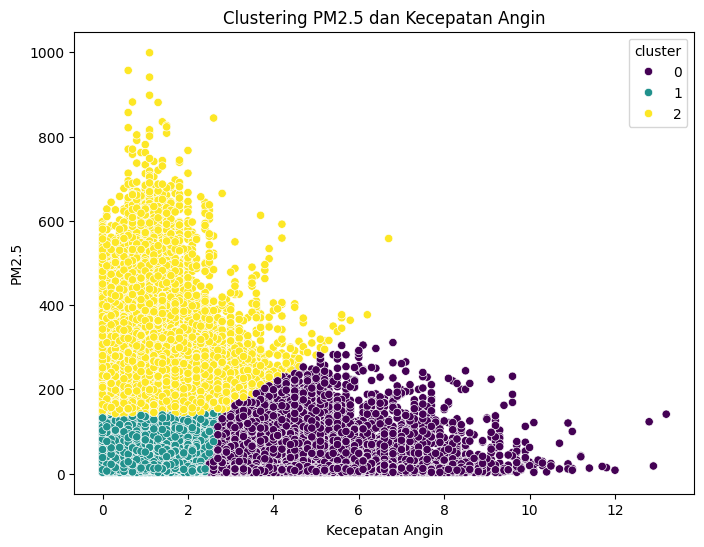

In [ ]:
X = all_df[['WSPM', 'PM2.5']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
all_df['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSPM', y='PM2.5', hue='cluster', data=all_df, palette='viridis')
plt.title('Clustering PM2.5 dan Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('PM2.5')
plt.show()

Insight:
* Klaster 1 bisa dianggap sebagai area dengan udara yang bersih, karena PM2.5 rendah.
* Klaster 2 mengindikasikan area dengan risiko polusi yang tinggi, terutama saat angin lemah.
* Klaster 0 menunjukkan kondisi dengan polusi sedang, di mana angin membantu mengurangi partikel polutan.

## Conclusion

- Terdapat pola dimana pada tahun 2016 semua polutan berkurang sedangkan O3 mengalami penaikan, namun di tahun 2017 semua polutan selain O3 mengalami peningkatan dan O3 mengalami penurunan.
- Kualitas udara berfluktuasi sepanjang hari, polutan selain O3 mengalami peningkatan di waktu pagi dan sore hari yang memang benar faktanya pengaruh suhu dengan O3.
- Suhu yang tinggi dapat mengakibatkan polutan seperti O3 mengalami peningkatan